# Homework 5 - Logistic Regression

In [ ]:
import numpy as np
import sklearn.datasets

from sklearn.linear_model import LogisticRegression

np.random.seed(12345)

# plot graphics in the notebook
%matplotlib inline

import seaborn as sns

import matplotlib.pyplot as plt
# set style
plt.style.use("fivethirtyeight")
# set default size of plots
plt.rcParams['figure.figsize'] = 16, 10

# import time
from IPython import display


In [ ]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)


## Мультикласова класифікація

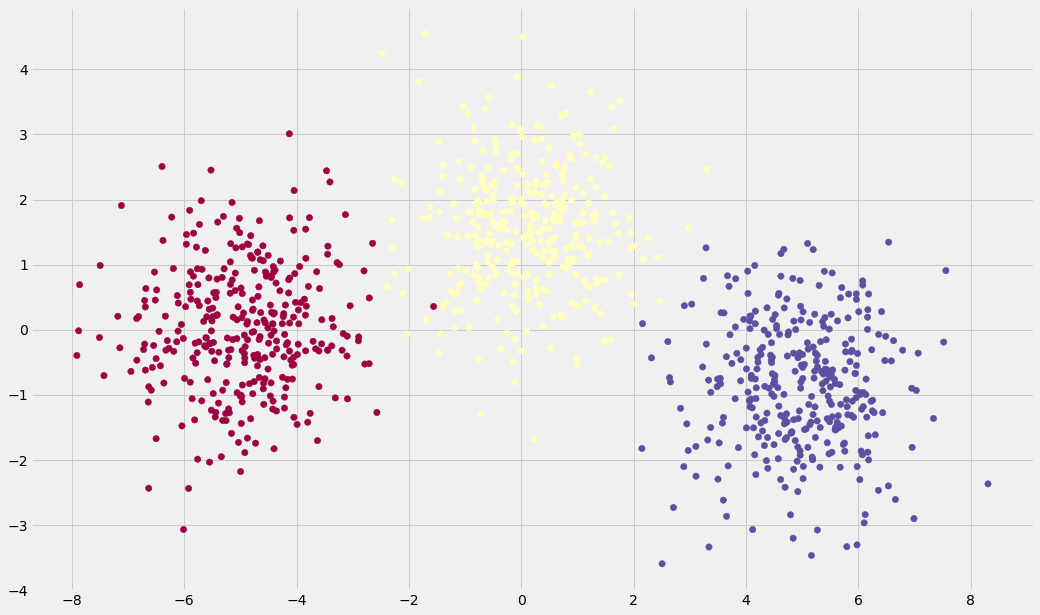

In [ ]:
np.random.seed(0)
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = sklearn.datasets.make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral);


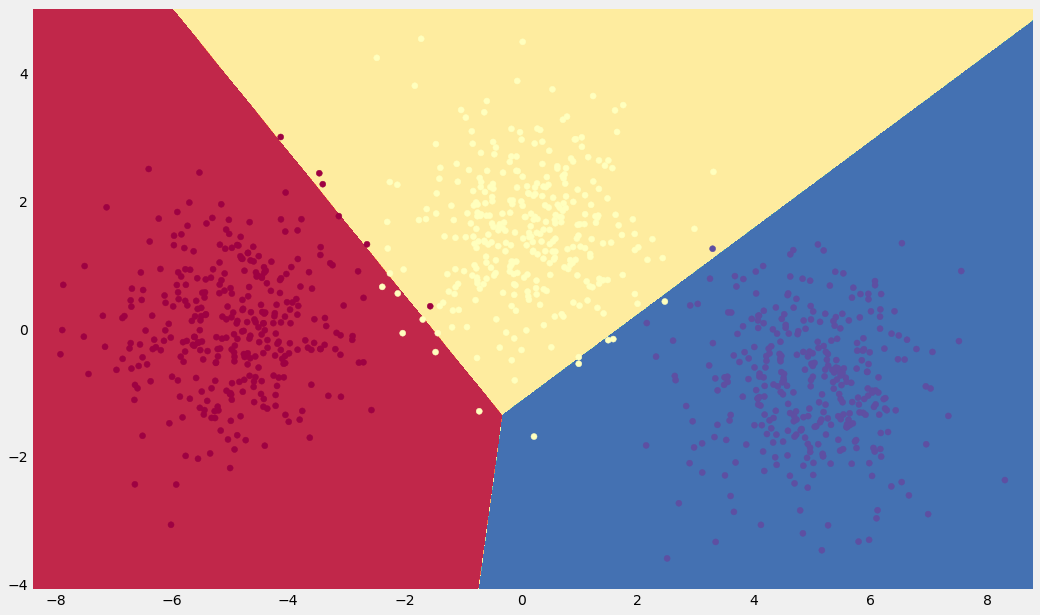

In [ ]:
lr = LogisticRegression(multi_class='ovr') # multi_class : {'ovr', 'multinomial'}
lr.fit(X, y)
plot_decision_boundary(lr.predict)


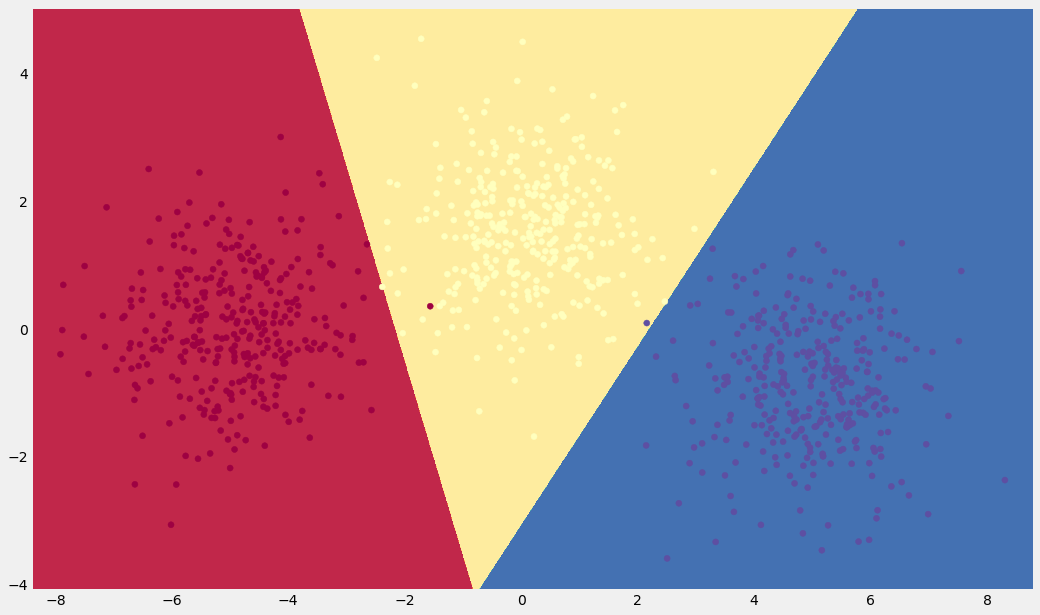

In [ ]:
lr = LogisticRegression(multi_class='multinomial') # multi_class : {'ovr', 'multinomial'}
lr.fit(X, y)
plot_decision_boundary(lr.predict)


***1.HW  - Реалізувати [softmax](https://en.wikipedia.org/wiki/Softmax_function) регресію для мультикласової класифікації***

$$ \sigma ({z} )_{i}={\frac {e^{z_{i}}}{\sum _{j=1}^{K}e^{z_{j}}}}\ \ \ \ {\text{ for }}i=1,\dotsc ,K{\text{ and }}  {z} =(z_{1},\dotsc ,z_{K})\in \mathbb {R} ^{K}. $$

In [ ]:
class SoftmaxRegression(object):

    def __init__(self,
                 add_intercept=True,
                 learning_rate=0.01,
                 max_iteration=1000,
                 verbose=0,
                 early_stopping=True,
                 max_iter_without_loss=5,
                 n_classes=None
                ):
        self.add_intercept = add_intercept
        self.learning_rate = learning_rate
        self.max_iteration = max_iteration
        self.verbose = verbose
        self.early_stopping = early_stopping
        self.max_iter_without_loss = max_iter_without_loss
        self.n_classes = n_classes


    @staticmethod
    def _cross_entropy(y_true, y_pred):
        return np.mean(-np.sum(y_true * np.log(y_pred), axis = 1))

    @staticmethod
    def _softmax(z):
       return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T

    @staticmethod
    def _labels_to_class(z):
       return z.argmax(axis=1)

    def _one_hot_enc(self, y, n_labels, dtype):
       matrix = np.zeros((len(y), n_labels))
       for i, val in enumerate(y):
          matrix[i, val] = 1
       return matrix.astype(dtype)


    def fit(self, X, y):
        if self.n_classes is None:
            self.n_classes = np.max(y) + 1

        if self.add_intercept:
            intercept = np.ones((X.shape[0], 1))
            X = np.hstack((intercept, X))

        self.weights = np.zeros((X.shape[1], self.n_classes))

        y_enc = self._one_hot_enc(y=y, n_labels=self.n_classes, dtype=float)

        min_loss = 10**6
        n_iter_no_change = 0
        for i in range(self.max_iteration):
            # get preds
            scores = np.dot(X, self.weights)
            softm_proba_predict = self._softmax(scores)
            # predictions = self._labels_to_class(softm_proba_predict)

            # how much did we miss?
            loss = self._cross_entropy(y_enc, softm_proba_predict)
            diff_loss = y_enc - softm_proba_predict

            if self.verbose:
                if (i % 1) == 0:
                    print(loss)

            # update weights
            self.weights = self.weights + self.learning_rate * np.dot(X.T, diff_loss)

            #early stopping
            if loss < min_loss:
                min_loss = loss
                n_iter_without_loss = 0
            else:
                n_iter_without_loss += 1


            if self.early_stopping:
                if n_iter_without_loss == self.max_iter_without_loss:
                    if self.verbose:
                        print(f'Stopped on {i} interation with loss {min_loss}')
                    break

    def predict_proba(self, X):
        if self.add_intercept:
            intercept = np.ones((X.shape[0], 1))
            X = np.hstack((intercept, X))

        scores = np.dot(X, self.weights)
        softm_proba_predict = self._softmax(scores)
        return softm_proba_predict

    def predict(self, X):
        proba_predict = self.predict_proba(X)
        predictions = self._labels_to_class(proba_predict)
        return predictions


In [ ]:
sr = SoftmaxRegression()
sr.fit(X, y)


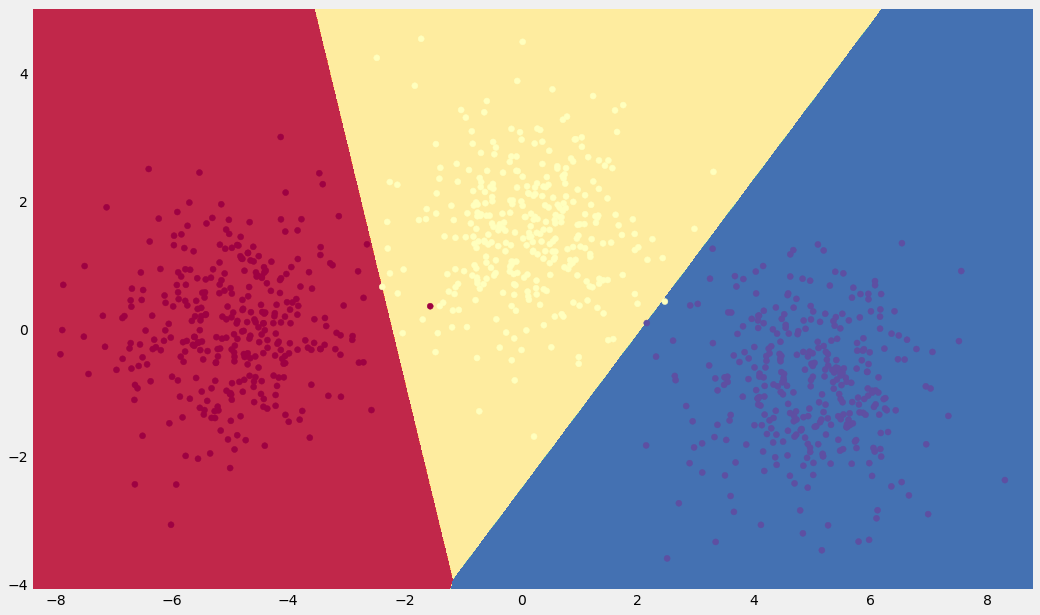

In [ ]:
plot_decision_boundary(sr.predict)
